### UR Bootcamp student:  Midlo-Marie
### Homework #6: Oneweathermapy API wrapper

##                         *Global distribution of basic weather variables*

###  Problem Statement:

In this study, the Openweathermapy API is used to access basic weather information at a randomly selected set of at least
500 cities evenly distributed across the globe. The objective is to build a series of scatter plots to evaluate and provide three
observations about the following physical relationships:
    
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


###  About Openweathermapy
Openweathermap is a small IT company established in 2014 by a group of engineers and experts in Big Data, data processing, and satellite imagery processing,
headquarters is in the UK, with an office in the US, and the development team in Latvia (EU). The company now has over 1.2 million
users and get 1500 new users every day and are a partner with Google.  They have a range of weather products from current conditions
to 16 day forecast products.

Openweather claims that their API is the easiest one for working with weather data.   After registering your credentials at
openweathermap.org, the API key is sent via email in about 2 hours.  There are 16 APIs available for each of their product types.
For this exercise, we will access the current weather data from their "Weather Stations" API with city name, id, geographic 
coordinates or zip code as endpoints.  (The JSON structure it responds with will be shown in the exercise results below)

> ##  Analysis Results

> **Note**:  The following figures are transposed from the example plots and
>            have latitude as the y-axis, per standard mapping conventions.
    
> ### **Figure 1. Temperature v. Latitude**
>
>  As expected, there is a strong relationship between latitude and surface air temperatures, with 
>  temperatures decreasing towards the poles.  The midpoint of the calendar year 2019 was July 2, such
>  that the current temperature curve is nearly balanced between northern and southern hemispheres with
>  minimum temperatures in populated cities being about equal 40 deg F at +/- 60 deg lat. More points
>  in the northern hemisphere are due to increased land mass and livable areas.
>
> ### **Figure 2. Relative Humidity v. Latitude**
>
>  Relative humidity at a specific place is highly variable on a daily basis as evidenced in this plot, but
>  the majority of values are above 70%.  Very dry areas are noted in high latitudes where there are also
>  colder air temperatures.
> 
> ### **Figure 3. Cloud amount v. Latitude**
>
>  Atmospheric moisture as indicated by cloud amount is the most variable parameter and ranges from 0 to 100%
>  cloud cover at all latitudes on a given day.  The "stacking" of data points at specific cloud amount values
>  appears to be a quantization artifact in the data, by which cloud amount is reported in standard increments.

> ### **Figure 4. Wind speed v. Latitude**
>
>  Instantaneous wind speed over these 500 cities is skewed towards lower values which is consistent with
>  the known Weibull global wind speed probability distribution which has a peak around 10 kts and tapers off rapidly 
>  over 25 kt.
>
> ### ADDTIONAL WORK: Geographic locations of data sites and representativeness of global conditions
>
> ### **Global map of data station positions**
>
>  Placing the city locations on the Google map shows how sparse this data set is as compared to the size of the globe.
>  Most importantly the vast ocean areas do not have reported values, except for a few island locations. 
>
> ## Conclusions.
>
>1. Without full coverage of land and ocean areas, and many additional samples, it is difficult to see the climotological
>   patterns in clouds and winds that have been known for centuries by scientists, farmers, and mariners.
>2. Temperature variations with latitude have the clearest signal, as a first order variable in direction correlation 
>   with solar heating.
>3. Atmospheric moisture parameters daily variation with latitude are more noisy in comparison to temperature unless averaged
>   over greater time periods and latitudinal bands.  There are long climotologies of cloud distributions that show
>   distinct patterns of cloud activity in specific zonal (latitudinal) bands.
>4. Wind speed distributions are consistent with the known Weibull distribution of global values.  However, wind direction
>   is not reported at most of the data stations, nor measured over a long enough period, which precludes comparison 
>   prevailing "trade" wind patterns that vary with latitude.

In [3]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import gmaps

import pandas as pd
import numpy as np
import requests
import time
import json

from time import gmtime, strftime  

# Import API key
from api_keys import api_key

# Google developer API key
from api_keys import gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities

Create a list of lat/long pairs of coordinates from a random, uniform distribution of latitudes and longitudes.
Use citipy API from Python to find the nearest city of more than 500 people to each lat/long coordinate.  Store
the cities in a list, as well as the initial coordinates to ensure that we have looked across the globe.

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat1=[]
lon1=[]

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat1.append(lat_lng[0])
        lon1.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])
# print(lat1[0],lon1[0])
# print(max(lat1),min(lon1))

613
thompson


> Following three plots are not part of the assignment but have been included to verify global geographic distributions 
> of city latitudes and longitudes after reduction of random values by nearest city.  The histograms of latitude and
> longitude and scatter of lat and long pairs show there are samples from the full range of populated areas, even though
> the sample size of 613 does not provide sufficient data to compute data averages from which overall patterns are 
> readily seen.  Also with the data skewed towards the northern hemisphere due to greater land mass and populations, the
> southern hemisphere data are underrepresented.

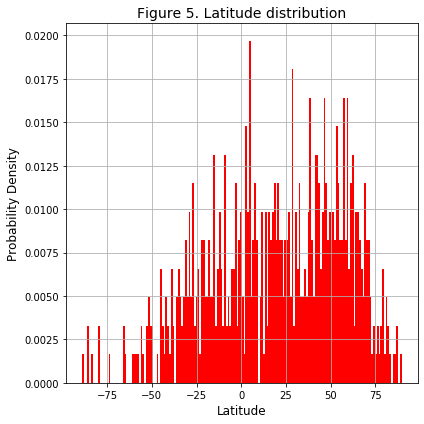

In [83]:
plt.figure(figsize=(6,6))
plt.title('Figure 5. Latitude distribution', fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid()
plt.hist(lat1, 180 , density=True, color='r')
# Save the Figure
plt.tight_layout()
plt.savefig("./LatitudeDistro.pdf")
plt.show()

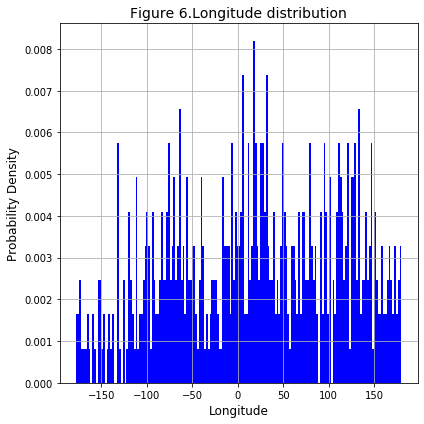

In [84]:
plt.figure(figsize=(6,6))
plt.title('Figure 6.Longitude distribution', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid()
plt.hist(lon1, 180, density=True, color='b')

# Save the Figure
plt.tight_layout()
plt.savefig("./LongitudeDistro.pdf")
plt.show()

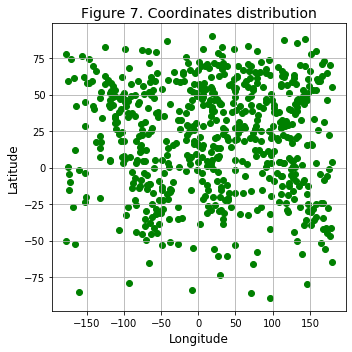

In [85]:
plt.figure(figsize=(5,5))
plt.title('Figure 7. Coordinates distribution', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
 # Build a scatter plot for each data type
plt.scatter(lon1, lat1, marker="o", color='green')
# Save the Figure
plt.tight_layout()
plt.savefig("./CoordsDistro.pdf")
plt.show()

### Perform API Calls

Having verified reasonable distributions of city locations, perform a weather 
check on each city using a successive API calls.

* Using the city names, query the Openweathermapy API to get current weather 
    information and basic meteorological parameters for all of the cities in the list.
* Include a print log of each city as it is being processed.
* Also, store latitude and longitudes to plot on a map for insight into where the data are being measured.


In [10]:
 # Test run the query to examine the structure of the data that are returned from the API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="

city = "Tampa"

# Get weather data
weather_response = requests.get(query_url+city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -82.46,
        "lat": 27.95
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 90.86,
        "pressure": 1015,
        "humidity": 66,
        "temp_min": 87.01,
        "temp_max": 95
    },
    "visibility": 16093,
    "wind": {
        "speed": 9.17,
        "deg": 200
    },
    "clouds": {
        "all": 75
    },
    "dt": 1566840041,
    "sys": {
        "type": 1,
        "id": 6057,
        "message": 0.0133,
        "country": "US",
        "sunrise": 1566817539,
        "sunset": 1566863891
    },
    "timezone": -14400,
    "id": 4174757,
    "name": "Tampa",
    "cod": 200
}


In [11]:
# Now run the queries over partial (testing), then full list of the cities 

# Set up lists to hold the response and store relevant data in the order they appear in the dictionary
long=[]
lat=[]
sfc_temp=[]
sfc_press=[]
rel_humidity=[]
wind_speed=[]
all_clouds=[]
city_id=[]
city_name=[]
country=[]

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL, append city name in for loop
query_url = f"{base_url}appid={api_key}&units={units}&q="

start_time = strftime("%Y -%m -%d %H:%M:%S", gmtime())
print(f"\t\tINITIATE Openweathermapy QUERIES\n")
print(f"\t\t{start_time}")
print(f"***************************************************\n")

# use this subsample for testing routines: cities_shortlist = cities[0:10]
count = 0
for city in cities:
    
    # Use exception handling construct to avoid crashing on null response
    
    try:
        weather_response = requests.get(query_url+city)
        weather_json = weather_response.json()
        
        long.append(weather_json["coord"]["lon"])
        lat.append(weather_json["coord"]["lat"])
        sfc_temp.append(weather_json["main"]["temp"])
        sfc_press.append(weather_json["main"]["pressure"])
        rel_humidity.append(weather_json["main"]["humidity"])
        wind_speed.append(weather_json["wind"]["speed"])
        all_clouds.append(weather_json["clouds"]["all"])
        city_id.append(weather_json["id"])
        city_name.append(weather_json["name"])
        country.append(weather_json["sys"]["country"])
        print(f"Retrieving record {count} for {city_id[count]} | {city_name[count]}" )
        count +=1
    except:
        print(f"\n{city} NOT found.  Moving to next record\n")
    continue
    
print(f"***************************************************\n")              
print(f"\t\tCOMPLETED Openweathermapy QUERIES\n")
end_time = strftime ("%Y -%m -%d %H:%M:%S", gmtime())
print(f"\t\t{end_time}")
print(f"***************************************************\n")

		INITIATE Openweathermapy QUERIES

		2019 -08 -26 17:42:16
***************************************************

Retrieving record 0 for 6165406 | Thompson
Retrieving record 1 for 2069194 | Jamestown
Retrieving record 2 for 3372760 | Praia da Vitoria
Retrieving record 3 for 2310547 | Aconibe
Retrieving record 4 for 4030556 | Rikitea
Retrieving record 5 for 2075265 | Busselton
Retrieving record 6 for 2175403 | Bluff
Retrieving record 7 for 3587498 | Acajutla
Retrieving record 8 for 962367 | Richards Bay
Retrieving record 9 for 2094342 | Kavieng
Retrieving record 10 for 3874787 | Punta Arenas
Retrieving record 11 for 3141667 | Roald
Retrieving record 12 for 4863349 | Basco
Retrieving record 13 for 1273574 | Vaini
Retrieving record 14 for 1006984 | East London
Retrieving record 15 for 264371 | Athens
Retrieving record 16 for 3698359 | Chicama
Retrieving record 17 for 2396518 | Port-Gentil
Retrieving record 18 for 3696183 | Iquitos
Retrieving record 19 for 1486321 | Yar-Sale
Retrieving rec

Retrieving record 160 for 2126123 | Chokurdakh
Retrieving record 161 for 286621 | Salalah
Retrieving record 162 for 4034551 | Faanui
Retrieving record 163 for 2122090 | Pevek
Retrieving record 164 for 3839307 | Rawson
Retrieving record 165 for 3996322 | Mazatlan
Retrieving record 166 for 588365 | Vao
Retrieving record 167 for 3021351 | Dinard
Retrieving record 168 for 4776222 | Norfolk
Retrieving record 169 for 103630 | Najran
Retrieving record 170 for 2127060 | Arman
Retrieving record 171 for 4407665 | Kodiak
Retrieving record 172 for 64814 | Bandarbeyla
Retrieving record 173 for 3441894 | Maldonado
Retrieving record 174 for 4732862 | Nome
Retrieving record 175 for 1505579 | Inta
Retrieving record 176 for 1818051 | Anjiang
Retrieving record 177 for 6138908 | Saint-Philippe
Retrieving record 178 for 2460954 | Araouane

louisbourg NOT found.  Moving to next record


nizhneyansk NOT found.  Moving to next record

Retrieving record 179 for 1242110 | Kalmunai
Retrieving record 180 for 7626

Retrieving record 323 for 2757220 | Den Helder
Retrieving record 324 for 1688687 | San Quintin
Retrieving record 325 for 1621313 | Ambulu
Retrieving record 326 for 5969785 | Hamilton
Retrieving record 327 for 1257277 | Sarahan

raga NOT found.  Moving to next record

Retrieving record 328 for 1651591 | Amahai
Retrieving record 329 for 3449340 | Sao Borja
Retrieving record 330 for 5906757 | Bow Island
Retrieving record 331 for 2123814 | Leningradskiy
Retrieving record 332 for 262462 | Chara
Retrieving record 333 for 490040 | Sovetskiy
Retrieving record 334 for 2015179 | Tommot

nguiu NOT found.  Moving to next record

Retrieving record 335 for 3421319 | Nuuk
Retrieving record 336 for 5972291 | Havre-Saint-Pierre
Retrieving record 337 for 3667983 | Las Palmas
Retrieving record 338 for 777682 | Skjervoy
Retrieving record 339 for 7071576 | Wuning
Retrieving record 340 for 536466 | Lebyazhye
Retrieving record 341 for 1850144 | Nishihara
Retrieving record 342 for 1607017 | Rayong
Retrieving 

Retrieving record 489 for 1525376 | Bestobe
Retrieving record 490 for 2508813 | Adrar
Retrieving record 491 for 5577158 | Fort Morgan
Retrieving record 492 for 3981460 | Coahuayana
Retrieving record 493 for 2274275 | Robertsport

tawkar NOT found.  Moving to next record


shkotovo-26 NOT found.  Moving to next record

Retrieving record 494 for 610298 | Beyneu
Retrieving record 495 for 1254241 | Tonk

stamsund NOT found.  Moving to next record

Retrieving record 496 for 3687505 | La Palma
Retrieving record 497 for 1789647 | Xichang

acarau NOT found.  Moving to next record

Retrieving record 498 for 2119283 | Zyryanka

warqla NOT found.  Moving to next record

Retrieving record 499 for 2013921 | Ust-Kuyga
Retrieving record 500 for 1486910 | Komsomolskiy
Retrieving record 501 for 2177671 | Armidale
Retrieving record 502 for 1000006 | Greytown
Retrieving record 503 for 3609418 | San Cristobal
Retrieving record 504 for 5660340 | Kalispell
Retrieving record 505 for 878054 | Masuguru
Retriev

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
# Create a dictionary, then DataFrame from the stored variables

weather_dict = {
    "City": city_name,
    "City_id": city_id,
    "Country":country,
    "Lat": lat,
    "Lon": long,
    "Sfc_temp_F": sfc_temp,
    "Sfc_press_mb": sfc_press,
    "Rel_humidity_pct":rel_humidity,
    "Wind_speed_kts": wind_speed,
    "Clouds_pct": all_clouds
}

weather_city_df = pd.DataFrame(weather_dict)
weather_city_df.count()

City                547
City_id             547
Country             547
Lat                 547
Lon                 547
Sfc_temp_F          547
Sfc_press_mb        547
Rel_humidity_pct    547
Wind_speed_kts      547
Clouds_pct          547
dtype: int64

In [91]:

# Export & Save Data Into a .csv.
weather_city_df.to_csv("./weather_city_df.csv")

weather_city_df.head(11)

,City,City_id,Country,Lat,Lon,Sfc_temp_F,Sfc_press_mb,Rel_humidity_pct,Wind_speed_kts,Clouds_pct
0,Thompson,6165406,CA,55.74,-97.86,51.80,1005.00,93,14.99,90
1,Jamestown,2069194,AU,-33.21,138.60,38.35,1027.21,85,2.10,44
2,Praia da Vitoria,3372760,PT,38.73,-27.07,73.40,1022.00,73,3.67,75
3,Aconibe,2310547,GQ,1.29,10.94,68.23,1014.55,98,2.82,100
4,Rikitea,4030556,PF,-23.12,-134.97,68.77,1019.11,63,11.18,6
5,Busselton,2075265,AU,-33.64,115.35,40.95,1016.00,61,11.32,31
6,Bluff,2175403,AU,-23.58,149.07,57.43,1018.32,81,5.21,18
7,Acajutla,3587498,SV,13.59,-89.83,84.25,1010.94,65,4.79,0
8,Richards Bay,962367,ZA,-28.77,32.06,68.95,1018.14,83,5.97,0
9,Kavieng,2094342,PG,-2.57,150.80,83.35,1008.35,68,1.68,50


### Plotting the Data

* Save the plotted figures

In [15]:
 # Plot cities on a map to see distribution and locations to show the small sample size
    
figure_layout = {
    
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

coord2 = pd.DataFrame({"lat":lat, "lon":long})
# coord2.head(11)

locations = coord2[["lat", "lon"]]
#print(locations[0:10])

cities_layer = gmaps.symbol_layer(
    locations, fill_color="green", stroke_color="green", scale=1 )

fig.add_layer(cities_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

#### Latitude vs. Temperature Plot

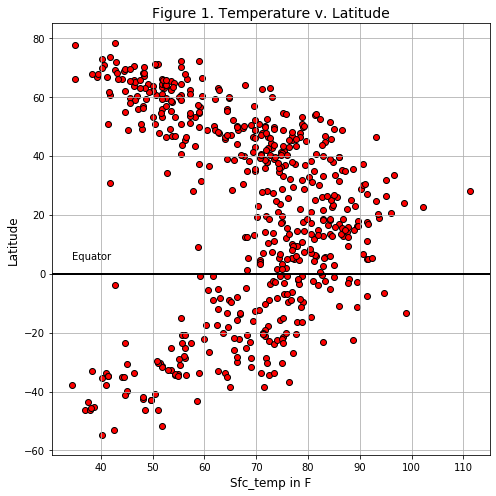

In [86]:
# Build Scatter Plot for Each Data Type
plt.figure(figsize=(7,7))
plt.title('Figure 1. Temperature v. Latitude', fontsize=14)
plt.xlabel('Sfc_temp in F', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
plt.scatter(weather_city_df["Sfc_temp_F"], weather_city_df["Lat"], facecolors="red", marker="o", edgecolor="black")
plt.axhline(y=0, color='black', linewidth=2)
plt.text(min(weather_city_df["Sfc_temp_F"]), 5, "Equator", color='black')
# Save the Figure
plt.tight_layout()
plt.savefig("./temp_lat.pdf")
plt.show()

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

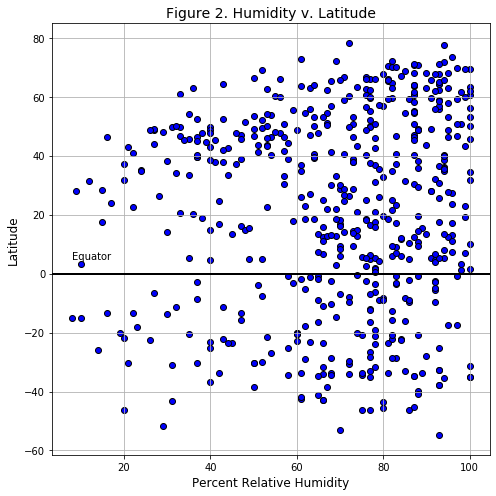

In [87]:
# Build Scatter Plot for Each Data Type

RH = weather_city_df["Rel_humidity_pct"]
lat3 = weather_city_df["Lat"]
RHgood = RH[np.abs(RH)<=100]
latgood = lat3[np.abs(RH)<=100]

plt.figure(figsize=(7,7))
plt.title('Figure 2. Humidity v. Latitude', fontsize=14)
plt.xlabel('Percent Relative Humidity', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
plt.scatter(RHgood, latgood, facecolors="blue", marker="o", edgecolor="black")

plt.axhline(y=0, color='black', linewidth=2)
plt.text(min(weather_city_df["Rel_humidity_pct"]), 5, "Equator", color='black')
# Save the Figure
plt.tight_layout()
plt.savefig("./RH_lat.pdf")
plt.show

#### Latitude vs. Cloudiness Plot

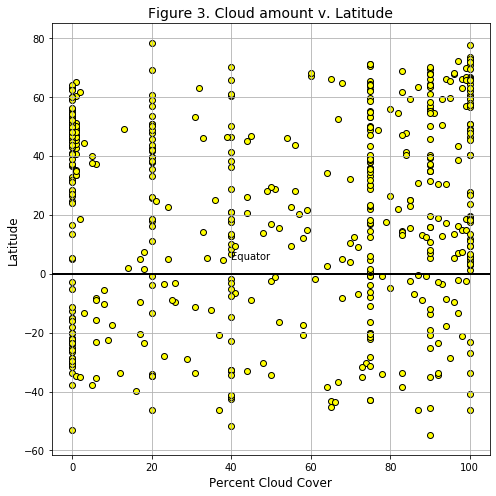

In [88]:
# Build Scatter Plot for Each Data Type

plt.figure(figsize=(7,7))
plt.title('Figure 3. Cloud amount v. Latitude', fontsize=14)
plt.xlabel('Percent Cloud Cover', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
plt.scatter(weather_city_df["Clouds_pct"], weather_city_df["Lat"], facecolors="yellow", marker="o", edgecolor="black")
plt.axhline(y=0, color='black', linewidth=2)
plt.text(min(weather_city_df["Clouds_pct"]+40), 5, "Equator", color='black')
# Save the Figure
plt.tight_layout()
plt.savefig("./cloud_lat.pdf")
plt.show()

#### Latitude vs. Wind Speed Plot

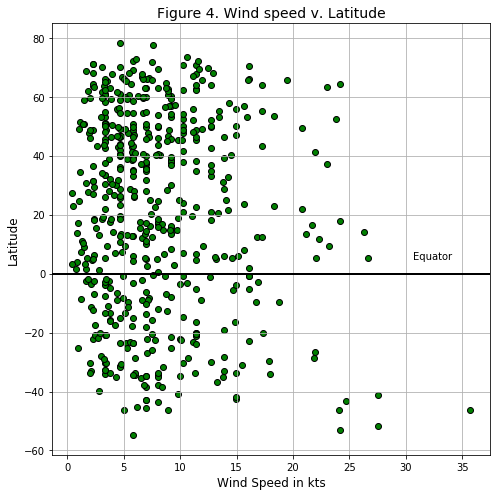

In [89]:

plt.figure(figsize=(7,7))
plt.title('Figure 4. Wind speed v. Latitude', fontsize=14)
plt.xlabel('Wind Speed in kts', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()
plt.scatter(weather_city_df["Wind_speed_kts"], weather_city_df["Lat"], facecolors="green", marker="o", edgecolor="black")
plt.axhline(y=0, color='black', linewidth=2)
plt.text(max(weather_city_df["Wind_speed_kts"]-5), 5, "Equator", color='black')
# Save the Figure
plt.tight_layout()
plt.savefig("./windspeed_lat.pdf")
plt.show()